In [5]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [7]:
df = pd.read_csv('Finaldimuon.csv')

In [8]:
print(df)

       Unnamed: 0 Type     Run      Event         E1       px1        py1  \
0           11386   GT  146511  267622505    7.53715  -5.18896   1.921050   
1           97339   GT  146510  146339837    8.58507   1.44816  -8.002430   
2           86600   GT  146510  104696928   36.63500  -4.86645  -9.812810   
3           33498   GG  146511  493709438   12.05240  -4.90028  -4.251090   
4           22152   GG  146511  171399555    8.92358  -2.20703  -0.308785   
...           ...  ...     ...        ...        ...       ...        ...   
49917       66318   GT  146514  266116849  117.23500 -36.86280  -2.487730   
49918        7611   GT  146511   33471677  175.29500 -36.97890  40.877500   
49919       38656   GT  146511  332740529  166.51300  11.55530 -32.721200   
49920       42531   GT  146511  164244768  198.33100  54.89460  19.601900   
49921       87389   GT  146510  121218699  102.48000   7.84822 -16.999600   

             pz1       pt1      eta1  ...      eta2      phi2  Q2         M

In [9]:
df.head()

,Unnamed: 0,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,...,eta2,phi2,Q2,M,Vector px Sum,Vector py Sum,Vector pz Sum,Resultant Momentum Sum,Final Energy,ENERGY LOST
0,11386,GT,146511,267622505,7.53715,-5.18896,1.921050,5.11681,5.53315,0.827155,...,1.754790,-2.184080,-1,4.22848,-5.957816,0.828640,8.86339,10.711764,11.51616,1.580000e-10
1,97339,GT,146510,146339837,8.58507,1.44816,-8.002430,2.74887,8.13241,0.331887,...,0.797469,-1.357460,-1,3.63056,2.989450,-15.117110,9.18942,17.941830,18.30547,4.450000e-10
2,86600,GT,146510,104696928,36.63500,-4.86645,-9.812810,-34.95910,10.95320,-1.877380,...,-2.349540,-2.598880,-1,2.52726,-5.775715,-10.361213,-40.47290,42.175458,42.25111,1.440000e-09
3,33498,GG,146511,493709438,12.05240,-4.90028,-4.251090,10.15700,6.48726,1.230660,...,1.242620,-1.151140,-1,6.93281,-2.774610,-9.015390,18.44170,20.714054,21.84344,3.280000e-09
4,22152,GG,146511,171399555,8.92358,-2.20703,-0.308785,8.64019,2.22852,2.064460,...,0.684614,0.256866,-1,11.84460,7.591400,2.264955,16.13051,17.970886,21.52318,4.190000e-09


In [39]:
#Feature Engineering

In [10]:
L = df['ENERGY LOST']

In [11]:
E1 = df['E1']

In [12]:
E2 = df['E2']

In [13]:
RPS = df['Resultant Momentum Sum']

In [14]:
M = df['M']

In [15]:
Px1 = df['px1']

In [16]:
Py1 = df['py1']

In [17]:
Pz1 = df['pz1']

In [18]:
Px2 = df['px2']

In [19]:
Py2 = df['py2']

In [20]:
Pz2 = df['pz2']

In [21]:
Pt1 = df['pt1']

In [22]:
FE = df['Final Energy']

In [43]:
#New feature creation using domain knowledge of the dataset
df['new'] = math.sqrt(abs((df['px1'] + df['px2'])**2 + (df['py1'] + df['py2'])**2 + (df['pz1'] + df['pz2'])**2 + (df['M'])**2)) 

In [44]:
new = df['new']

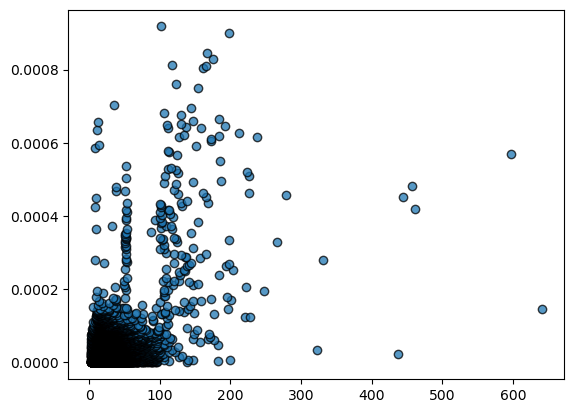

In [42]:
plt.scatter(E1, L, edgecolor = 'black', linewidth = 1, alpha = 0.75)

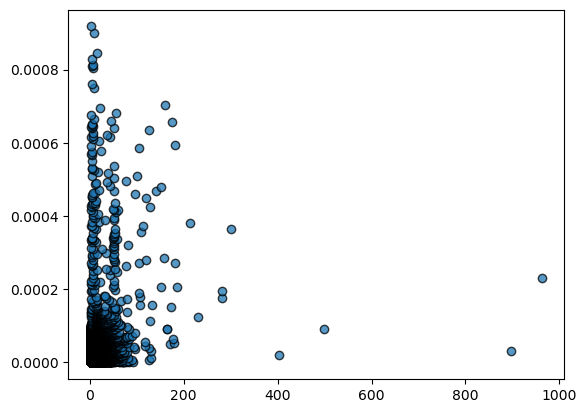

In [24]:
plt.scatter(E2, L, edgecolor = 'black', linewidth = 1, alpha = 0.75)

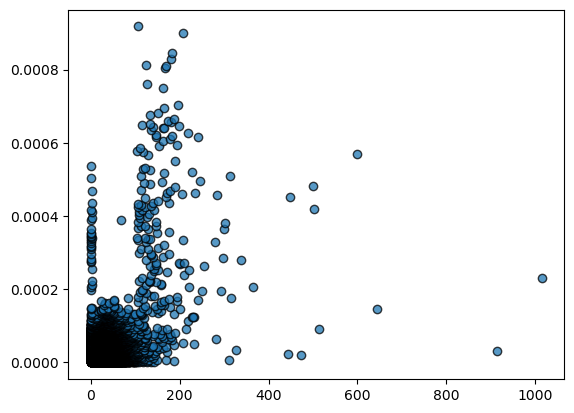

In [25]:
plt.scatter(RPS, L, edgecolor = 'black', linewidth = 1, alpha = 0.75)

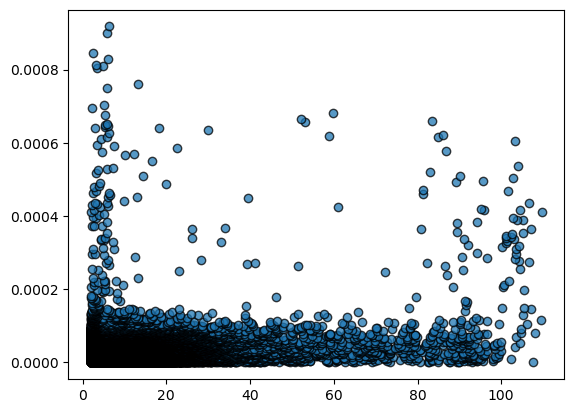

In [26]:
plt.scatter(M, L, edgecolor = 'black', linewidth = 1, alpha = 0.75)

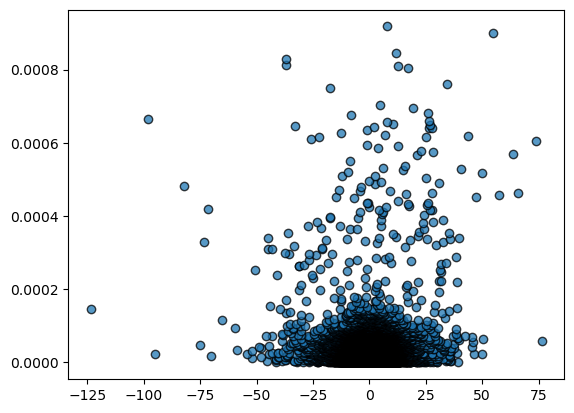

In [27]:
plt.scatter(Px1, L, edgecolor = 'black', linewidth = 1, alpha = 0.75)

In [28]:
x = df[['E2', 'E1','new']]

In [29]:
y = df['ENERGY LOST']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
sklearn_predictions = regr.predict(X_test)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

score = regr.score(X_test,y_test)


print("score is", score)


Intercept: 
 6.879996710178421e-10
Coefficients: 
 [ 1.00000802  1.00000802 -1.00000802]
score is 0.9999994940521293


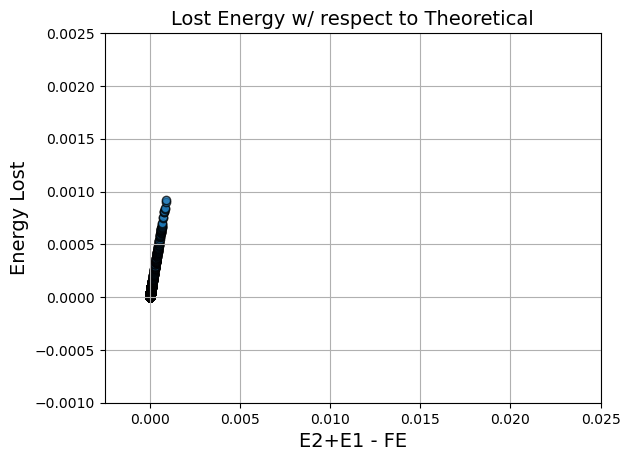

In [31]:
plt.xlim(-0.0025, 0.025)
plt.ylim(-0.001,0.0025)
plt.title('Lost Energy w/ respect to Theoretical', fontsize=14)
plt.xlabel('E2+E1 - FE', fontsize=14)
plt.ylabel('Energy Lost', fontsize=14)
plt.scatter((E2+E1 - FE), L, edgecolor = 'black', linewidth = 1, alpha = 0.75)
plt.grid(True) 

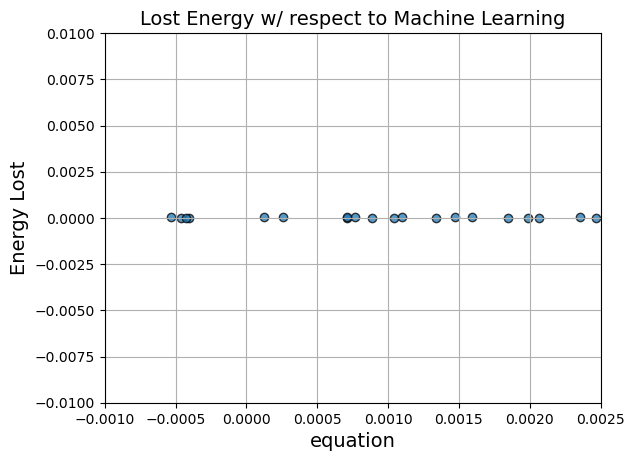

In [32]:
plt.xlim(-0.001, 0.0025)
plt.ylim(-0.01,0.01)
plt.title('Lost Energy w/ respect to Machine Learning', fontsize=14)
plt.xlabel('equation' , fontsize=14)
plt.ylabel('Energy Lost', fontsize=14)
plt.scatter((pow(6.566,-6) + pow(4.787,-7)*E2 + pow(8.454,-7)*E1 + pow(1.871,-7)*Px1 + pow(-1.507,-8)*Px2 + pow(1.108,-8)*Py1 + pow(-3.762, -7)*Py2 + pow(7.103,-8)*Pz1 + pow(-7.286, -8)*Pz2 + pow(3.284,-7)*M), L, edgecolor = 'black', linewidth = 1, alpha = 0.75)
plt.grid(True)

In [33]:
y1 = pow(6.566,-6) + pow(4.787,-7)*E2 + pow(8.454,-7)*E1 + pow(1.871,-7)*Px1 + pow(-1.507,-8)*Px2 + pow(1.108,-8)*Py1 + pow(-3.762, -7)*Py2 + pow(7.103,-8)*Pz1 + pow(-7.286, -8)*Pz2 + pow(3.284,-7)*M

In [34]:
y2 = E2+E1 - FE

In [35]:
L-y1

0        -0.753370
1         3.445212
2         4.413947
3         1.850293
4        -0.207777
           ...    
49917     1.637018
49918   -17.531990
49919    14.215975
49920    -9.381498
49921     7.411229
Length: 49922, dtype: float64

In [36]:
L - y2

0        1.580000e-10
1        4.450000e-10
2        1.440000e-09
3        3.280000e-09
4        4.190000e-09
             ...     
49917    1.400001e-08
49918   -2.299999e-08
49919   -1.000002e-08
49920    2.800002e-08
49921   -2.600000e-08
Length: 49922, dtype: float64